In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
windowSize = 5
outputs = pd.read_csv("outputs-{}-window".format(windowSize))
inputs = pd.read_csv("inputs-{}-window".format(windowSize))

b = outputs["Goal Difference"].values.flatten()
results = outputs["Result"].values.flatten()

b3 = np.zeros(shape = (len(results), 3), dtype=np.int32)
for index, result in enumerate(results):
    if result == "Home Win":
        b3[index][0] = 1
    elif result == "Draw":
        b3[index][1] = 1
    elif result == "Home Loss":
        b3[index][2] = 1

A = inputs.loc[:, ~inputs.columns.isin(["Date", "Home", "Away"])].values
assert len(A) == len(b3)
numSamples, numFeatures = A.shape
A.shape

(1301, 41)

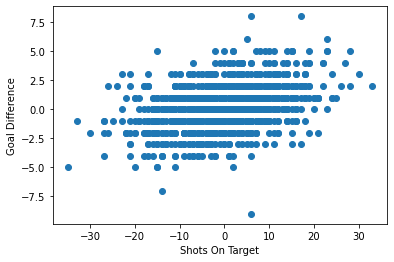

In [6]:
plt.scatter(x = inputs["5 Game Rolling Window Shots on Target Difference"].values, y = b)
plt.xlabel("Shots On Target")
plt.ylabel("Goal Difference")
plt.show()

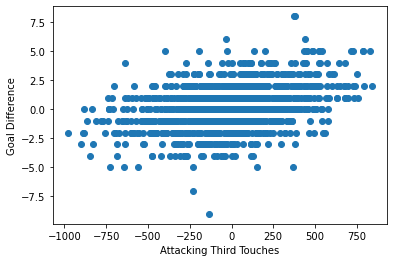

In [7]:
plt.scatter(x = inputs["5 Game Rolling Window Attacking Third Touches Difference"].values, y = b)
plt.xlabel("Attacking Third Touches")
plt.ylabel("Goal Difference")
plt.show()

In [3]:
#Method of least squares
At = np.transpose(A)
x = np.dot(np.matmul(np.linalg.inv(np.matmul(At, A)), At), b)
prediction = np.dot(A, x)
MSE = ((prediction - b)**2).sum()/len(prediction)
MSE

2.8000440859599354

In [6]:
pd.DataFrame(x).to_csv("least-squares", index=False)

In [16]:
x = pd.read_csv("least-squares").values

(1301, 1)

In [4]:
At = np.transpose(A)
x = np.dot(np.matmul(np.linalg.inv(np.matmul(At, A)), At), b3)
prediction = np.dot(A, x)

correct = 0
total = len(outputs)

for pred, act in zip(prediction, b3):
    pred -= pred.min()
    assert sum(pred) != 0
    pred /= sum(pred)
    if act[pred.argmax()] > 0:
        correct += 1

print(correct/total)

0.528055342044581
